# 소프트맥스 회귀(Softmax Regression) 

1. 원-핫 인코딩(one-hot encoding)  
  
선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법  
  
강아지 = [1, 0, 0]  
고양이 = [0, 1, 0]  
냉장고 = [0, 0, 1]    
  
이렇게 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터(one-hot vector)라고 한다.  
  
보통 다중 클래스 분류의 레이블로 사용되는데, 다중 클래스의 레이블을 단순히 1,2,3... 으로 표현하면 순서나 거리를 학습 데이터로 활용할 수 있으므로 원-핫 인코딩을 사용하는 것이 좋다. 
  
2. 다중 클래스 분류  
  
붓꽃 분류  
꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이의 수치에 따라 붓꽃의 품종을 분류할 수 있다.  
  
<table border=1 cellspacing=0>
<tr>
    <th>꽃받침길이(x1)</th><th>꽃받침넓이(x2)</th><th>꽃잎길이(x3)</th><th>꽃잎넓이(x4)</th><th>Species(y)</th>
</tr>
<tr>
    <td>5.1</td><td>3.5</td><td>1.4</td><td>0.2</td><td>setosa</td>
</tr><tr>
    <td>4.9</td><td>3.0</td><td>1.4</td><td>0.2</td><td>setosa</td>
</tr><tr>
    <td>5.8</td><td>2.6</td><td>4.0</td><td>1.2</td><td>versicolor</td>
</tr><tr>
    <td>6.7</td><td>3.0</td><td>5.2</td><td>2.3</td><td>virginica</td>
</tr><tr>
    <td>5.6</td><td>2.8</td><td>4.9</td><td>2.0</td><td>virginica</td>
</tr></table>  
  
<로지스틱 회귀>  
로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만든다.  
  
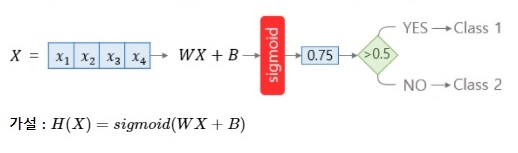  
  
<소프트맥스 회귀>  
다중 클래스 분류에서 사용되는 알고리즘으로 각 클래스별 확률을 계산하고 모든 확률의 합은 1이 된다.  
  
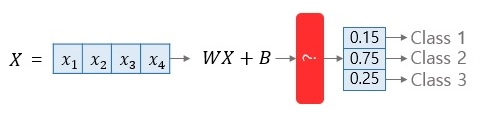  
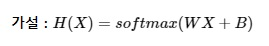  
  
3. 소프트맥스 함수  
  
k차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률을 pi로 나타내면 소프트맥스 함수는 pi를 다음과 같이 정의한다.  
  
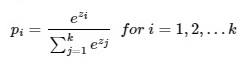  
  
위 붓꽃 문제는 k=3이므로 3차원 벡터 z=[z1, z2, z3]의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴한다.  
  
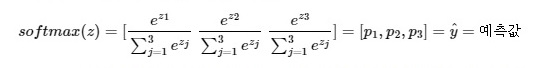  
  
p1, p2, p3 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 된다.  
  
이 수식을 붓꽃 품종과 연결하면 다음과 같다.  
  
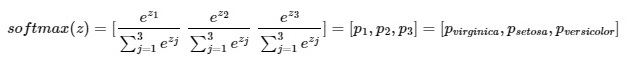  
  
샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 한다. 아래 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 z로 표현한다.  
  
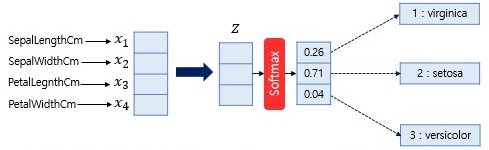  
  
샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단하다. 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행한다. 아래 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경된다.  
  
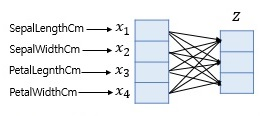  
  
적절한 w, b를 찾으려면 결국 오차를 계산하여 이를 최소화하는 방향으로 이동해야 한다. 오차는 실제값과 예측치의 차를 계산하는 것이므로 실제값이 필요한데, 붓꽃분류의 실제값은 붓꽃의 품종이름이다. 그래서 이를 표현할 원-핫 인코딩이 필요하다.  
  
virginica = [1, 0, 0]  
setosa = [0, 1, 0]  
versicolor = [0, 0, 1]  
  
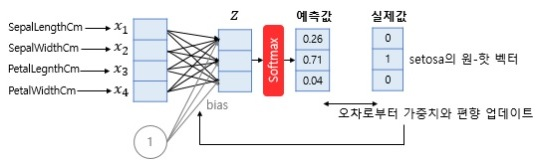    
  
계산한 예측값과 실제값의 오차를 계산하여 가중치와 편향을 수정한다.  
이를 행렬로 표현하면 다음과 같다.    

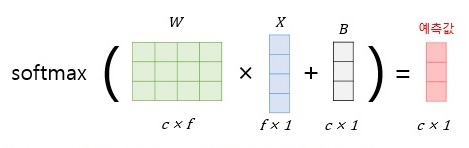  
  
이를 수식으로 표현하면 다음과 같다.  
  
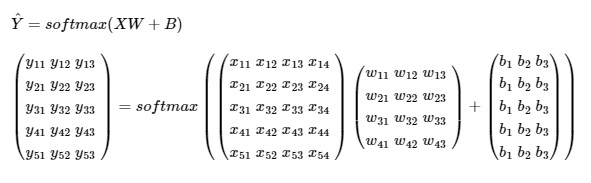  
  
4. 비용함수  
  
소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다.    
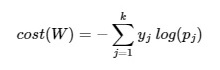  
y는 실제값을 나타내며, k는 클래스의 개수로 정의. yj는 실제값 원-핫 벡터의 j번째 인덱스를 의미하며, pj는 샘플 데이터가 j번째 클래스일 확률을 나타낸다. c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, pc=1은 예측값이 실제값을 정확하게 예측한 경우가 된다. 이를 식에 대입해보면 -1log(1)=0이 되기 때문에, 결과적으로 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다.  
  
그러므로 최종 비용 함수는 다음과 같다.  
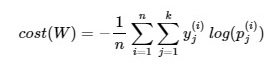  
  
5. 비용함수 구현1  
  

In [2]:
import torch
import torch.nn.functional as F

In [3]:
torch.manual_seed(1)

In [4]:
# 소프트맥스 입력값. 입력 데이터에 가중치와 편향이 적용된 값
z = torch.FloatTensor([1, 2, 3])

In [5]:
hypothesis = F.softmax(z, dim=0)
hypothesis

tensor([0.0900, 0.2447, 0.6652])

In [6]:
# 모든 예측 값의 합은 1
hypothesis.sum()

tensor(1.)

In [7]:
hypothesis.argmax()

tensor(2)

In [8]:
# 소프트맥스 입력값. 3행 5열을 난수로 생성
z = torch.rand(3, 5, requires_grad=True)
z

tensor([[0.4550, 0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843, 0.3398],
        [0.5239, 0.7981, 0.7718, 0.0112, 0.8100]], requires_grad=True)

In [10]:
hypothesis = F.softmax(z, dim=1)
hypothesis

tensor([[0.1664, 0.1871, 0.1737, 0.2695, 0.2033],
        [0.2002, 0.1783, 0.2218, 0.1944, 0.2054],
        [0.1809, 0.2380, 0.2318, 0.1084, 0.2409]], grad_fn=<SoftmaxBackward>)

In [11]:
hypothesis[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [12]:
y = torch.randint(5, (3,)).long()
y

tensor([3, 1, 2])

In [13]:
# 원-핫 인코딩

# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 

# scatter_(dim=1, 위치=[[3],[1],[2]], val=1) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [14]:
# 비용함수 직접 구현

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
cost

tensor(1.4992, grad_fn=<MeanBackward0>)

6. 비용함수 구현2  
위에서 torch.log(hypothesis) 수식은  
torch.log(F.softmax(z, dim=1)) 인데,  
파이토치는 log()와 softmax()를 합한 함수 F.log_softmax()를 제공한다.  

In [15]:
F.log_softmax(z, dim=1)

tensor([[-1.7935, -1.6760, -1.7504, -1.3114, -1.5929],
        [-1.6086, -1.7244, -1.5062, -1.6381, -1.5826],
        [-1.7096, -1.4354, -1.4617, -2.2223, -1.4236]],
       grad_fn=<LogSoftmaxBackward>)

In [16]:
# 비용함수
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4992, grad_fn=<MeanBackward0>)

F.nll_loss(): 비용함수    
원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용  
nll이란 Negative Log Likelihood의 약자

In [17]:
# 비용함수 계산
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4992, grad_fn=<NllLossBackward>)

F.cross_entropy()  
  
=> F.log_softmax() + F.nll_loss()  
  
위 두 기능을 한번에 수행함  

In [18]:
F.cross_entropy(z, y)

tensor(1.4992, grad_fn=<NllLossBackward>)

7. 소프트맥스 회귀 구현

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [20]:
torch.manual_seed(1)

In [21]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [22]:
x_train

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])

In [23]:
y_train

tensor([2, 2, 2, 1, 1, 1, 0, 0])

1) 직접구현

In [24]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
y_one_hot

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [25]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [32]:
nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) #w1x1+w2x2+w3x3...+b

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/2000 Cost: 0.385264
Epoch  100/2000 Cost: 0.358230
Epoch  200/2000 Cost: 0.330755
Epoch  300/2000 Cost: 0.306726
Epoch  400/2000 Cost: 0.294556
Epoch  500/2000 Cost: 0.285188
Epoch  600/2000 Cost: 0.276404
Epoch  700/2000 Cost: 0.268141
Epoch  800/2000 Cost: 0.260353
Epoch  900/2000 Cost: 0.252995
Epoch 1000/2000 Cost: 0.246030
Epoch 1100/2000 Cost: 0.239426
Epoch 1200/2000 Cost: 0.233155
Epoch 1300/2000 Cost: 0.227190
Epoch 1400/2000 Cost: 0.221510
Epoch 1500/2000 Cost: 0.216093
Epoch 1600/2000 Cost: 0.210922
Epoch 1700/2000 Cost: 0.205980
Epoch 1800/2000 Cost: 0.201252
Epoch 1900/2000 Cost: 0.196724
Epoch 2000/2000 Cost: 0.192384


In [33]:
hypothesis

tensor([[6.2047e-06, 1.2226e-03, 9.9877e-01],
        [1.1724e-02, 1.8617e-01, 8.0211e-01],
        [1.3276e-08, 2.4693e-01, 7.5307e-01],
        [2.6230e-07, 7.4276e-01, 2.5724e-01],
        [2.3182e-01, 7.4632e-01, 2.1858e-02],
        [1.1330e-01, 8.8670e-01, 1.4528e-10],
        [7.8430e-01, 2.1570e-01, 4.8951e-07],
        [9.2262e-01, 7.7379e-02, 6.3080e-09]], grad_fn=<SoftmaxBackward>)

In [34]:
for i in hypothesis:
    print(i.max(dim=0)[1])

tensor(2)
tensor(2)
tensor(2)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)


In [40]:
# 테스팅
new_var =  torch.FloatTensor([[3., 1., 3., 4.]])
predict = F.softmax(new_var.matmul(W) + b, dim=1) 
predict

tensor([[1.3242e-08, 2.4689e-01, 7.5311e-01]], grad_fn=<SoftmaxBackward>)

In [41]:
predict.max(dim=1)[1]

tensor([2])

2) F.cross_entropy() 함수로 구현

In [42]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/2000 Cost: 1.098612
Epoch  100/2000 Cost: 0.761050
Epoch  200/2000 Cost: 0.689991
Epoch  300/2000 Cost: 0.643229
Epoch  400/2000 Cost: 0.604117
Epoch  500/2000 Cost: 0.568255
Epoch  600/2000 Cost: 0.533922
Epoch  700/2000 Cost: 0.500291
Epoch  800/2000 Cost: 0.466908
Epoch  900/2000 Cost: 0.433507
Epoch 1000/2000 Cost: 0.399962
Epoch 1100/2000 Cost: 0.366378
Epoch 1200/2000 Cost: 0.333642
Epoch 1300/2000 Cost: 0.307042
Epoch 1400/2000 Cost: 0.294653
Epoch 1500/2000 Cost: 0.285279
Epoch 1600/2000 Cost: 0.276489
Epoch 1700/2000 Cost: 0.268222
Epoch 1800/2000 Cost: 0.260429
Epoch 1900/2000 Cost: 0.253066
Epoch 2000/2000 Cost: 0.246098


3) nn.Module로 구현

In [43]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

In [45]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/2000 Cost: 0.254477
Epoch  100/2000 Cost: 0.234852
Epoch  200/2000 Cost: 0.223383
Epoch  300/2000 Cost: 0.212954
Epoch  400/2000 Cost: 0.203418
Epoch  500/2000 Cost: 0.194667
Epoch  600/2000 Cost: 0.186609
Epoch  700/2000 Cost: 0.179166
Epoch  800/2000 Cost: 0.172272
Epoch  900/2000 Cost: 0.165868
Epoch 1000/2000 Cost: 0.159906
Epoch 1100/2000 Cost: 0.154342
Epoch 1200/2000 Cost: 0.149139
Epoch 1300/2000 Cost: 0.144263
Epoch 1400/2000 Cost: 0.139686
Epoch 1500/2000 Cost: 0.135380
Epoch 1600/2000 Cost: 0.131324
Epoch 1700/2000 Cost: 0.127496
Epoch 1800/2000 Cost: 0.123878
Epoch 1900/2000 Cost: 0.120454
Epoch 2000/2000 Cost: 0.117209


In [47]:
# 테스팅
new_var =  torch.FloatTensor([[3., 1., 3., 4.]])
predict = model(new_var)
predict

tensor([[-11.7496,   5.5948,   7.5650]], grad_fn=<AddmmBackward>)

In [48]:
predict.max(dim=1)[1]

tensor([2])

* 붓꽃 분류

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x_data = df.drop('Name', axis=1)
x_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
class_name = df['Name'].drop_duplicates().values
class_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
y_data = pd.get_dummies(df, columns=['Name'])
y_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_Iris-setosa,Name_Iris-versicolor,Name_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
y_data = y_data[['Name_Iris-setosa','Name_Iris-versicolor','Name_Iris-virginica']].values
y_data

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [8]:
x_train = torch.FloatTensor(x_data.values)
y_train = torch.LongTensor(y_data)

In [9]:
x_train

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [10]:
y_train = y_train.argmax(dim=1)
y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [12]:
model = nn.Linear(4, 3) #param1:속성은 4개 / param2:이 모델의 결과는 소프트맥스의 입력으로 들어가므로 분류할 클래스의 개수
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 2000

for e in range(epochs):
    
    pred = model(x_train)
    cost = F.cross_entropy(pred, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if e % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            e, epochs, cost.item()
        ), end='\t')
        x = F.softmax(pred, dim=1) # [[0.1,0.8,0.1],[0.7,0.2,0.1],[0.1,0.3,0.6]]  [[1],[0],[2]]
        ok = x.argmax(dim=1)==y_train
        ok = ok[ok==True]
        print('acc:', (len(ok)/len(y_train))*100)

Epoch    0/2000 Cost: 2.002691	acc: 33.33333333333333
Epoch  100/2000 Cost: 0.430768	acc: 77.33333333333333
Epoch  200/2000 Cost: 0.263012	acc: 96.66666666666667
Epoch  300/2000 Cost: 0.220289	acc: 97.33333333333334
Epoch  400/2000 Cost: 0.192888	acc: 98.0
Epoch  500/2000 Cost: 0.173722	acc: 98.0
Epoch  600/2000 Cost: 0.159520	acc: 98.0
Epoch  700/2000 Cost: 0.148544	acc: 98.0
Epoch  800/2000 Cost: 0.139786	acc: 98.0
Epoch  900/2000 Cost: 0.132621	acc: 98.0
Epoch 1000/2000 Cost: 0.126638	acc: 98.0
Epoch 1100/2000 Cost: 0.121560	acc: 98.0
Epoch 1200/2000 Cost: 0.117189	acc: 98.0
Epoch 1300/2000 Cost: 0.113382	acc: 98.66666666666667
Epoch 1400/2000 Cost: 0.110034	acc: 98.66666666666667
Epoch 1500/2000 Cost: 0.107061	acc: 98.66666666666667
Epoch 1600/2000 Cost: 0.104403	acc: 98.66666666666667
Epoch 1700/2000 Cost: 0.102010	acc: 98.66666666666667
Epoch 1800/2000 Cost: 0.099842	acc: 98.66666666666667
Epoch 1900/2000 Cost: 0.097868	acc: 98.66666666666667


In [31]:
new_var = torch.FloatTensor(x_train[149].unsqueeze(0))
pred = F.softmax(model(new_var), dim=1)
print(class_name[pred.argmax().item()])

Iris-virginica


* 손글씨 숫자 인식

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [3]:
mnist_train = dsets.MNIST(root='mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

0.2%

100.0%


Extracting mnist_data/MNIST\raw\train-images-idx3-ubyte.gz to mnist_data/MNIST\raw



102.8%


Extracting mnist_data/MNIST\raw\train-labels-idx1-ubyte.gz to mnist_data/MNIST\raw



100.0%


Extracting mnist_data/MNIST\raw\t10k-images-idx3-ubyte.gz to mnist_data/MNIST\raw



112.7%

Extracting mnist_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist_data/MNIST\raw

Processing...



c:\users\playdata\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
#미니 배치 구성
data_loader = DataLoader(dataset=mnist_train, batch_size=100, shuffle=True, drop_last=True)

In [6]:
linear = nn.Linear(784, 10) # 784=28*28  / 10: 0~9까지 클래스 수
cost = nn.CrossEntropyLoss() #내부에 소프트맥스 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [7]:
#학습
epoch=20
for e in range(epoch):
    avg_cost=0
    
    for x, y in data_loader:
        x = x.view(-1, 784)
        
        optimizer.zero_grad()
        h = linear(x)
        c = cost(h, y)
        c.backward()
        optimizer.step()
        
        avg_cost += c/len(data_loader)
        
    print('epoch:', e, ' / cost:', avg_cost)

epoch: 0  / cost: tensor(0.5352, grad_fn=<AddBackward0>)
epoch: 1  / cost: tensor(0.3595, grad_fn=<AddBackward0>)
epoch: 2  / cost: tensor(0.3313, grad_fn=<AddBackward0>)
epoch: 3  / cost: tensor(0.3168, grad_fn=<AddBackward0>)
epoch: 4  / cost: tensor(0.3071, grad_fn=<AddBackward0>)
epoch: 5  / cost: tensor(0.3003, grad_fn=<AddBackward0>)
epoch: 6  / cost: tensor(0.2951, grad_fn=<AddBackward0>)
epoch: 7  / cost: tensor(0.2909, grad_fn=<AddBackward0>)
epoch: 8  / cost: tensor(0.2873, grad_fn=<AddBackward0>)
epoch: 9  / cost: tensor(0.2845, grad_fn=<AddBackward0>)
epoch: 10  / cost: tensor(0.2820, grad_fn=<AddBackward0>)
epoch: 11  / cost: tensor(0.2797, grad_fn=<AddBackward0>)
epoch: 12  / cost: tensor(0.2778, grad_fn=<AddBackward0>)
epoch: 13  / cost: tensor(0.2760, grad_fn=<AddBackward0>)
epoch: 14  / cost: tensor(0.2744, grad_fn=<AddBackward0>)
epoch: 15  / cost: tensor(0.2731, grad_fn=<AddBackward0>)
epoch: 16  / cost: tensor(0.2716, grad_fn=<AddBackward0>)
epoch: 17  / cost: tenso

In [13]:
# 테스팅
x_test = mnist_test.test_data.view(-1, 28*28).float()
y_test = mnist_test.test_labels

pred = F.softmax(linear(x_test), dim=1)
pred_y = pred.argmax(dim=1)
ok = pred_y == y_test
acc = (ok.float().sum()/len(ok))*100
print('acc:', acc)

acc: tensor(87.8100)


In [25]:
import matplotlib.pyplot as plt

def num_test(idx):
    x = x_test[idx] 
    y = y_test[idx]
    pred = F.softmax(linear(x.unsqueeze(0)), dim=1).argmax(dim=1)
    print('정답:', y)
    print('예측:', pred)
    plt.imshow(x.view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

정답: tensor(2)
예측: tensor([2])


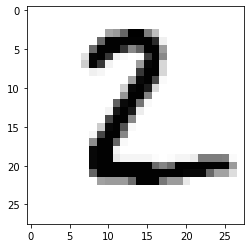

In [26]:
num_test(1)

In [27]:
x_test[1] 

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116., 125.,
        171., 255., 255., 150.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 169., 253., 253., 253., 253., 253., 253., 218.,  30.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 169., 25